## Exercício 1

__Primeiro protótipo__: Desenvolva uma interface gráfica que pegue, em tempo real, as informações sobre os dados de quais anos estão disponíveis no site do [Instituto Nacional de Meteorologia](https://portal.inmet.gov.br/dadoshistoricos). Os anos disponíveis devem ser apresentados utilizando um widget apropriado que permita selecionar um, e apenas um ano. Se não tiver conexão a Internet ou se o site não estiver disponível o aplicativo deve mostrar uma mensagem de erro na interface.


### Criado requisição e manipulação dos dados da web
Foi criado a classe Coleta dados. Para criar a requisição para acessar esses dados foi utilizado os pacotes __requests__  e __BeautifulSoup__ posteriormente agrupou os anos disponiveis e os links de cada ano para o donwload dos arquivos.




In [ ]:
import requests
from bs4 import BeautifulSoup

class ColetaDados():
    def __init__(self):
        self._anosLinks = []

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        
        # CRIANDO A REQUISIÇÃO PARA ACESSAR OS DADOS
        try:
            resposta = requests.get("https://portal.inmet.gov.br/dadoshistoricos", headers=headers)


        # COLETANDO INFORMAÇÕES DO SITE PEGANDO HTML DO SITE EM FORMA DE TEXTO
            html = BeautifulSoup(resposta.text, 'html.parser')
        
        
        # MOSTRANDO A PRIMEIRA TAG DO HTML ARTICLE CHAMADA ARTICLE
        # FIND_ALL PEGA TODOS ("ARTICLE") DO SITE
            articlesTag = html.find_all('article')


        # INTERAÇÃO PARA CADA ELEMENTO ARTICLE DA PAGINA
        ## find REALIZA UM METODO DE PESQUISA QUE PESQUISA POR TAG (a) E ACESSA (href)
            for article in articlesTag:
                link = article.find('a')["href"]
        
        
        # REALIZA OUTRA PESQUISA DIVIDINDO A STRING COM O METODO split e acessa a segunda posição [1]
                ano = article.find('a').string.split(" ")[1]
                
                
        # CRIA UM DICIONARIO DE ANO E LINK E ADICIONA A LISTA ANOSLINKS
                self._anosLinks.append({"ano":ano,"link":link})
        except:
            pass
        
# EXEMPLO 
dados = ColetaDados()
for i in dados._anosLinks:
    print(f"{i['ano']}, {i['link']}")

Protopito 01

In [ ]:
%run -m prototipo1 ;

## Exercício 2

__Segundo protótipo__: Com base no ano escolhido sua aplicação deve baixar o arquivo compactado, com os dados de todas as estações, descompactar ele numa pasta temporária e mostrar em um outro widget a lista de estações disponíveis para selecionar uma e apenas uma delas. O widget do protótipo anterior deve ficar disponível para que o usuário possa trocar o ano se desejar. Nesse caso um novo arquivo será baixado e descompactado e as estações disponíveis exibidas para seleção.

### Donwload e descompactação dos arquivos .zip
Para realizar o donwload Na __classe ColetaDados__ foi utilizada para realizar o donwload na mesma além disso, o  novo atributo __path__ foi implementado que é referente ao caminho de download.


-> O pacote __os__ foi utilizado para verificar se o arquivo ja foi baixado anteriormente e para criar a pasta que receberá os donwloads caso a mesma não tenha sido criada antes. 


-> O pacote __wget__ foi utilizado para realizar o donwload do arquivo csv recebendo o link do donwload como parametro.


-> O pacote __zipfile__ é reponsavel por descompactar o arquivo zip em uma subpasta com o nome do ano.


-> A função __getEstacoes__ rebece um ano como parametro e busca todos os arquivos contidos na pasta com o nome do ano e retorna uma lista de dicionarios com o nome e caminho de cada estação.



In [ ]:
import requests
from bs4 import BeautifulSoup
import wget
import zipfile
import os

class ColetaDados():
    def __init__(self):
        self._anosLinks = []
        self._path="./prototipo2Donwloads/"

        if not os.path.exists(self._path):
            os.makedirs(self._path)
        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
        try:
            resposta = requests.get("https://portal.inmet.gov.br/dadoshistoricos", headers=headers)

        

            html = BeautifulSoup(resposta.text, 'html.parser')
        
            articlesTag = html.find_all('article')


            for article in articlesTag:
                link = article.find('a')["href"]
                
                ano = article.find('a').string.split(" ")[1]
                self._anosLinks.append({"ano":ano,"link":link})
        except:
            pass

    
# FUNÇÃO QUE RETORNA AS DADOS CONTIDO NA LISTA anosLinks
    def getDados(self):
        return self._anosLinks
# FUNÇÃO QUE RETORNA AO VALOR DO ATRIBUTO path (execultáveis)
    def getPath(self):
        return self._path
        
        
# REALIZA O DONWLOAD DO ARQUIVO .ZIP
    def donwloadCSV(dado,path):
        
        
# ACESSANDO O VALOR DA CHAVE ANO E LINK DO DICIONÁRIO DADO E ATRIBUI A VÁRIAVEL
        ano = dado["ano"]
        link = dado["link"]


#CRIA O CAMINHO COMPLETO PARA BAIXAR O ZIP
## os.path.join CONCATENA AS PARTES DO CAMINHO DE FORMA CORRETA

        pathArquivo = os.path.join(path, ano + ".zip")

# VERIFICANDO SE O O ARQUIVO ZIP JA EXISTE NA PASTA
        if  not ano+".zip" in os.listdir(path):
            wget.download(link,pathArquivo)
            
# ZipFile É USADO PARA ABRIR O ARQUIVO ZIP EM MODO DE LEITURA
            with zipfile.ZipFile(pathArquivo,"r") as zip:
                
                # VERIFICA O NOME DO ARQUIVO É O MESMO DO ANO SE SIM, EXTRAI OS ARQUIVOS NA PASTA
                if  zip.namelist()[0].split("/")[0] == ano:
                    zip.extractall(path)
                else:
                    zip.extractall(path+"/"+ano+"/")
    
# FUNÇÃO QUE EXTRAI AS INFORMAÇÕES SOBRE AS ESTAÇÕES METEOROLOGICAS DOS ARQUIVOS CRIADOS NA PASTA
    def getEstacoes(ano,path):
        estacoes = []
        try:
            # LISTANDO TODOS PS ARQUIVOS DENTRO DA PASTA
            files = os.listdir(path+ano+"/")
            for file in files:
                
                # CRIANDO UM DICIONÁRIO QUE CONTEM AS ESTAÇÕES E O CAMINHO CORRETO DO ARQUIVO
                estacoes.append({
                    "estação":file.split("_")[4],
                    "path": os.path.join(path,ano, file)})
        except Exception:
            print(f"Não há dados de estações baixadas para o ano {ano}")

        return estacoes


#EXEMPLO
# #INTERAGE COM O USUARIO PARA SELECIONAR UM ANO E BAIXAR O CSV CORRESPONDENTE E EXTRAI AS INFORMAÇÕES.
dados = ColetaDados()
i = int(input(f"Digite um valor entre {0} e {len(dados._anosLinks)-1} para selecionar o ano"))
ColetaDados.donwloadCSV(dados._anosLinks[i], dados._path)
estacoes = ColetaDados.getEstacoes(dados._anosLinks[i]['ano'],dados._path)
for j,k in enumerate(estacoes):
    print(f"{j}: \testação: {k['estação']},    csv path: {k['path']}")

Protopito 02

In [ ]:
%run -m prototipo2 ;

# Exercício 3

__Terceiro protótipo__: Com base na estação selecionada gere e exiba dentro da aplicação os gráficos de precipitações e temperaturas medias mensais para a estação selecionada. A interface deve permitir que o usuário troque a estação selecionada a qualquer momento, assim como foi feito co o ano, gerando novos gráficos.   

### Gerando graficos
Para a geração de graficos foi criada a classe __VerificacaoDeDados__ que em seu construtor recebe como parametro o caminho para o arquivo csv
O mesmo tambem é responsavel por criar uma Pandas.DataFrame com caminho do csv e fazer o primeiro tratamento, garantindo que o DataFrame seja padronizado observando as principais discrepancias entre os CSVs.
A classe tambem conta com um metodo filtraDados que filtra os dados que foram preenchidos com valor muito grande


Conta com o metodo __geraGraficos__ que gera os graficos de média da temperatura mensal e precipitação acumulada mensal e retorna o __GCF__ que serve como parametro para a integração com a interface
Para tornar o processo mais comodo e evitar que a interface tenha uma  instancia da classe __AnaliseDeDados__ como parametro foi desenvolvida a função __plotGraficos__ que internamente cria uma instancia da clase __AnaliseDeDados__, filtra os dados, gera o grafico e retorna o __GCF__

In [ ]:
import pandas as pd
from numpy import nan
import matplotlib.pyplot as plt

class VerificacoDeDados():
    
     # CLASSE PARA ABRIR O ARQUIVO CSV, TRANSFORMAR EM UM DATA FRAME DO PANDAS, FILTRAR DADOS E PLOTAR P GRÁFICO 

    def __init__(self,csv):
      
       # CONSTRUTOR DA CLASSE QUE RECEBE O CAINHO DO CSV COMO PARAMETRO
       #RENOMEIA O TITULO DO DATA FRAME
        
        self._df = pd.read_csv(csv, encoding='iso-8859-1', decimal=',', delimiter=';', skiprows=8)
        self._df.rename({"DATA (YYYY-MM-DD)":"Data","HORA (UTC)":"Hora","Hora UTC":"Hora"},axis=1,inplace=True)
        self._df.index = pd.DatetimeIndex(self._df["Data"]+" "+self._df["Hora"], name="DATA")


    # FUNÇÃO QUE FILTRA OS DADOS PRENCHIDOS DE MODO A REPRESENTAR OS DADOS FALTANTE
    def filtraDados(self):
       
        # LOCALIZANDO AS LINHAS DO VALOR ABSOLUTO SEJA MAIOR QUE 1000 E SUBSTITUINDO POR NAN
        self._df.loc[self._df["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].abs() > 1000, "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] = nan
        self._df.loc[self._df["TEMPERATURA DO PONTO DE ORVALHO (°C)"].abs() > 1000, "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"] = nan
    
    # FUNÇÃO RESPONSÁVEL POR GERAR OS GRAFICOS DA TEMPERATURA SELECIONADA E DE PRECIPITAÇÃO MEDIA MENSAL
    def geraGraficos(self):

        plt.clf()
        plt.subplot(2,1,1)
        
        # CALCULANDO A MÉDIA MENSAL DA TEMPERATURA DO AR E DA PRECIPITAÇÃO PLOTANDO O GRAFICO AO LONGO DOS MESES
        self._df.groupby(self._df.index.month)["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"].mean().plot(
            ylabel="TEMPERATURA (°C)",
            xlabel="MÊS",
            title="TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",
            marker="s")
        plt.grid()
        plt.subplot(2,1,2)
        # CALCULA O ACUMULADO DA PRECIPITAÇÃO
        self._df.groupby(self._df.index.month)["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].sum().plot(
            ylabel="PRECIPITAÇÃO (mm)",
            xlabel="MÊS",
            title="PRECIPITAÇÃO MÉDIA MENSAL ",
            marker="s")
        plt.grid()
        plt.subplots_adjust(wspace=1,hspace=1)
        
        #RETONA PARA GCF QUE SERVE PARA INTERAÇÃO COM A INTERFACE
        return plt.gcf()
    
    
    # REALIZA O PROCESSO DE ANÁLISE E GERAÇÃO DE GRÁFICO DO ARQUIVO CSV
    def plotGrafico(csv):
        # CRIANDO INSTÂNCIA PARA FILTRAR DADOS DO CSV
        grafico = VerificacoDeDados(csv)
        grafico.filtraDados()
        return grafico.geraGraficos()

#EXEMPLO
# CRIANDO INSTANCIA DADOS PARA COLETAR E BAIXAR DADOS DO CSV
dados = ColetaDados()
i = int(input(f"Digite um valor entre {0} e {len(dados._anosLinks)-1} para selecionar o ano"))
ColetaDados.donwloadCSV(dados._anosLinks[i], dados._path)
estacoes = ColetaDados.getEstacoes(dados._anosLinks[i]['ano'],dados._path)
for j,k in enumerate(estacoes):
    print(f"{j}: \testação: {k['estação']},    csv path: {k['path']}")
i = int(input(f"Digite um valor entre {0} e {j} para selecionar a estção"))

VerificacoDeDados.plotGrafico(estacoes[i]["path"]);


Protopito 03




Finalizando Programa...

Excluindo donwloads...

Donwloads excluidos com sucesso!


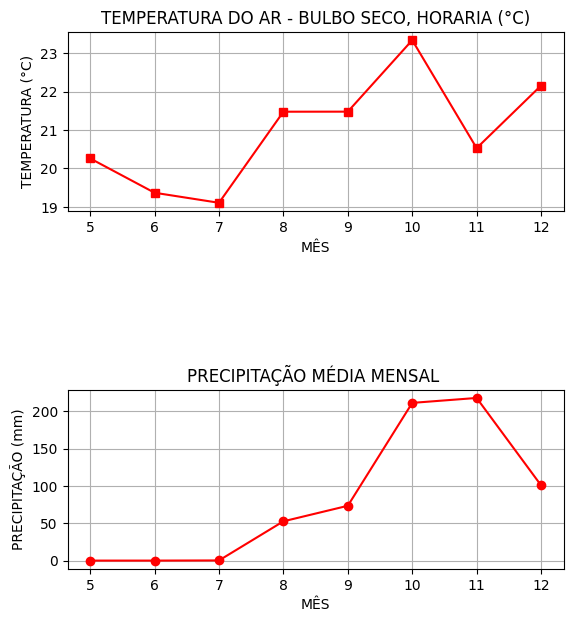

: 

In [1]:
%run -m prototipo3 ;